In [51]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from main import simulate
from src.mpc import Controller, Dimension
import src.terminal_set as terminal_set


if __name__ == "__main__":
    dt = 0.10  # Sampling period
    N = 3  # MPC Horizon
    T = 100  # Duration of simulation

    dim = Dimension(nx=12, nu=4, ny=3, nd=3)

    x_init = np.zeros(dim.nx)  # Initial conditions
    y_target = np.zeros(dim.ny)  # State to reach
    y_target[0:3] = np.array([1.0, 1.0, 1.0])

    Controller
    ctrl1 = Controller(
        dim=dim,
        mpc_horizon=N,
        timestep_mpc_stages=dt,
    )
    ctrl2 = Controller(
        dim=dim,
        mpc_horizon=N,
        timestep_mpc_stages=dt,
    )
    ctrl3 = Controller(
        dim=dim,
        mpc_horizon=N,
        timestep_mpc_stages=dt,
    )
    ctrl4 = Controller(
        dim=dim,
        mpc_horizon=N,
        timestep_mpc_stages=dt,
    )
    ctrl5 = Controller(
        dim=dim,
        mpc_horizon=N,
        timestep_mpc_stages=dt,
    )
    ctrl6 = Controller(
        dim=dim,
        mpc_horizon=N,
        timestep_mpc_stages=dt,
    )
    ctrl1.beta = 0.01
    ctrl2.beta = 1.0
    ctrl3.beta = 2.0
    ctrl4.beta = 3.0
    ctrl5.beta = 4.0
    ctrl6.beta = 5.0

    # (x_target1, _) = ctrl1.computeOTS(y_target, np.zeros(ctrl1.dim.nd))
    # (x_target2, _) = ctrl2.computeOTS(y_target, np.zeros(ctrl2.dim.nd))
    # (x_target3, _) = ctrl3.computeOTS(y_target, np.zeros(ctrl3.dim.nd))
    # (x_target4, _) = ctrl4.computeOTS(y_target, np.zeros(ctrl4.dim.nd))
    # (x_target5, _) = ctrl5.computeOTS(y_target, np.zeros(ctrl5.dim.nd))

    # ctrl1.c_level = terminal_set.calculate_c(ctrl1, x_target1)
    # ctrl2.c_level = ctrl1.c_level
    # ctrl3.c_level = ctrl1.c_level
    # ctrl4.c_level = ctrl1.c_level
    # ctrl5.c_level = ctrl1.c_level

    # ctrl2.c_level = terminal_set.calculate_c(ctrl2, x_target2)
    # ctrl3.c_level = terminal_set.calculate_c(ctrl3, x_target3)

    # ctrl4.c_level = terminal_set.calculate_c(ctrl4, x_target4)
    # ctrl5.c_level = terminal_set.calculate_c(ctrl5, x_target5)
    # ctrl6.c_level = terminal_set.calculate_c(ctrl6, x_target1)

    states1, _, _, Vf1, stage_cost1, _, _, time_cost1 = simulate(
        controller=ctrl1, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states2, _, _, Vf2, stage_cost2, _, _, time_cost2 = simulate(
        controller=ctrl2, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states3, _, _, Vf3, stage_cost3, _, _, time_cost3 = simulate(
        controller=ctrl3, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states4, _, _, Vf4, stage_cost4, _, _, time_cost4 = simulate(
        controller=ctrl4, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states5, _, _, Vf5, stage_cost5, _, _, time_cost5 = simulate(
        controller=ctrl5, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    states6, _, _,Vf6, stage_cost6, _, _, time_cost6 = simulate(
        controller=ctrl6, x_init=x_init, y_target=y_target, T=T, use_terminal_set=False
    )
    ###################################### Plot position error

    

Simulating: 100%|██████████| 100/100 [00:01<00:00, 87.41it/s]


#1f77b4


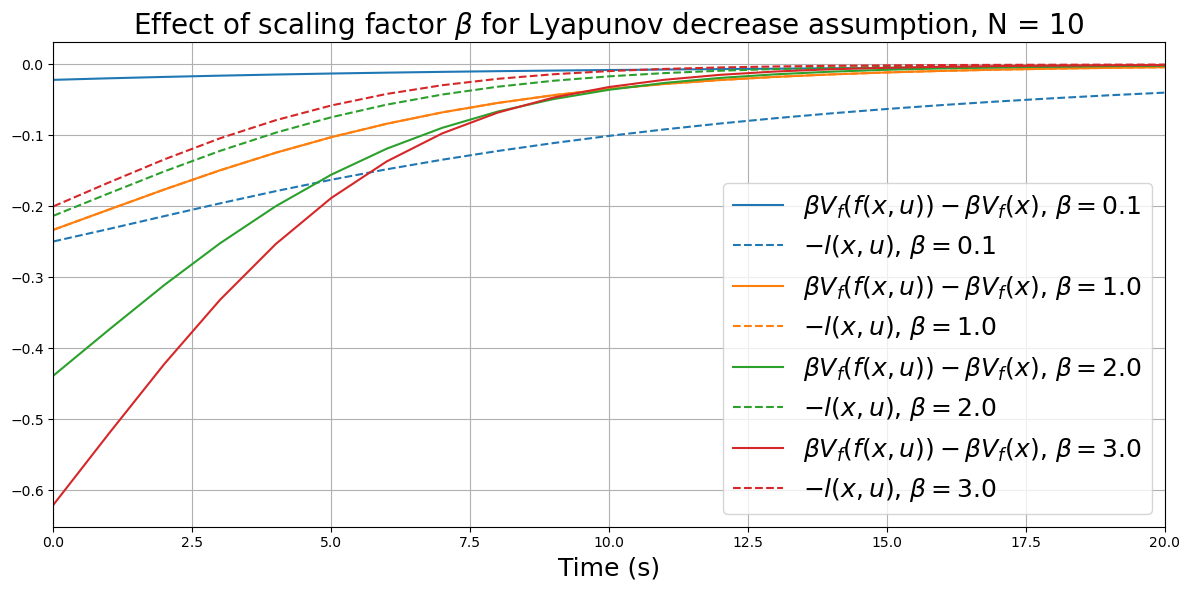

In [40]:
import matplotlib.colors as mcolors

def plot_lyapunov(Vf, l, T,ctrl, plt, c):
    Vf_diff = Vf[1:] - Vf[0:-1]
    l_diff = l[0:-1]

    plt.plot(range(0, T - 1), Vf_diff,color=c, label=r"$\beta V_f(f(x,u)) - \beta V_f(x)$" + r", $\beta = $" + str(ctrl.beta))
    plt.plot(range(0, T - 1), -l_diff,color=c, linestyle='--', label=r"$-l(x,u)$" + r", $\beta = $" + str(ctrl.beta))
    # plt.plot(range(0, T - 1), Vf[1:], color="b", label=r"$V_f(f(x,u))$")
    # plt.plot(range(0, T - 1), Vf[0:-1], color="m", label=r"$V_f(x)$")

f3 = plt.figure(figsize=(12, 6))
print(mcolors.TABLEAU_COLORS['tab:blue'])
# plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)
plt.title(r"Effect of scaling factor $\beta$ for Lyapunov decrease assumption, N = 10", fontsize=20)
plot_lyapunov(Vf1, stage_cost1, T, ctrl1, plt, mcolors.TABLEAU_COLORS['tab:blue'])
plot_lyapunov(Vf2, stage_cost2, T, ctrl2, plt, mcolors.TABLEAU_COLORS['tab:orange'])
plot_lyapunov(Vf3, stage_cost3, T, ctrl3, plt, mcolors.TABLEAU_COLORS['tab:green'])
plot_lyapunov(Vf4, stage_cost4, T, ctrl4, plt, mcolors.TABLEAU_COLORS['tab:red'])
# plot_lyapunov(Vf5, stage_cost5, T, ctrl5, plt, mcolors.TABLEAU_COLORS['tab:brown'])
# plot_lyapunov(Vf6, stage_cost6, T, ctrl6, plt, mcolors.TABLEAU_COLORS['tab:pink'])

plt.xlim((0, 20))
plt.xlabel("Time (s)", fontsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
plt.grid()
plt.show()

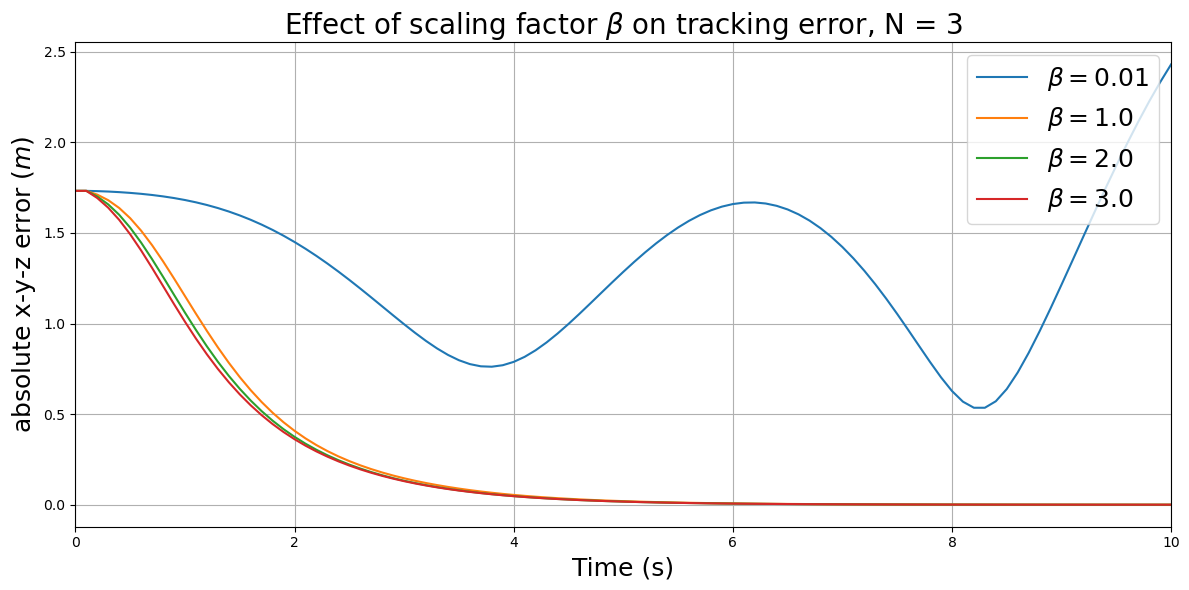

In [55]:
# As Cd is identity matrix, here we can use target output to represent target state
def error(states):
    # Euclidean error on x, y, z
    error = np.sqrt(
        np.square(y_target[0] - states[0, :])
        + np.square(y_target[1] - states[1, :])
        + np.square(y_target[2] - states[2, :])
    )
    return error

f3 = plt.figure(figsize=(12, 6))
t = np.arange(0, 10.1, 0.1)


# plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)
plt.title(r"Effect of scaling factor $\beta$ on tracking error, N = " + str(N), fontsize=20)
plt.plot(t, error(states1), color=mcolors.TABLEAU_COLORS['tab:blue'], label=r"$\beta = $" + str(ctrl1.beta))
plt.plot(t, error(states2),color=mcolors.TABLEAU_COLORS['tab:orange'], label=r"$\beta = $" + str(ctrl2.beta))
plt.plot(t, error(states3),color=mcolors.TABLEAU_COLORS['tab:green'], label=r"$\beta = $" + str(ctrl3.beta))
plt.plot(t, error(states4),color=mcolors.TABLEAU_COLORS['tab:red'], label=r"$\beta = $" + str(ctrl4.beta))
# plot_lyapunov(Vf5, stage_cost5, T, ctrl5, plt, mcolors.TABLEAU_COLORS['tab:brown'])
# plot_lyapunov(Vf6, stage_cost6, T, ctrl6, plt, mcolors.TABLEAU_COLORS['tab:pink'])

plt.xlim((0, 10))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"absolute x-y-z error $(m)$", fontsize=18)
plt.legend(fontsize=18, loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()